# Benchmark optimizers 

In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
plt.rcParams.update({'font.size': 18})

In [3]:
def plot_results(inputs,obj):
    f = plt.figure(figsize=(20,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.set_ylabel('X')
    ax.set_xlabel('function evaluation')
    ax.plot(inputs)
    ax2.set_ylabel('Normalized $\epsilon$')
    ax2.set_xlabel('function evaluation'); ax2.set_yscale('log')
    ax2.plot(obj,'--b');  

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pickle
import numpy as np
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.insert(1, '/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/GPTrelated')
saveResultsQ = False
import scipy
import tensorflow as tf
# from CorrectDefocus import CorrectDefocus

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
os.environ["CUDA_VISIBLE_DEVICES"]="0" # specify which GPU to use
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

# Booth function

In [60]:
ndim = 2 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
start_point = [[0.1 ,0.1]]
start_point = [[0.36567956155397874, 0.4570565113450329]]

#creat machine interface
# model_path = 'CNNmodels/VGG16_test13_attempt06.h5'
model_path = 'CNNmodels/VGG16_emit+defocus_test6_attempt3.h5'
mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption = 1, CNNpath = model_path) 
print(mi.getState())

Model loaded


/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Using CNN prediction.
saving ronchigram...
(array([[0.36567956, 0.45705651]]), array([[0.96766192]]))


In [7]:
class function:
    def __init__(self):
        self.my_counter= 0
        self.my_x = []
        self.my_y = []
    
    def Booth(self,x):
        print(x)
        mi.setX([x])
        y = mi.getState()[1][0]
        self.my_counter += 1
        self.my_x += [x]  
        self.my_y += [y]
        return 1-y

x0 = np.array([0.5, 0.5]).astype('float64') #this is the maximum location
xs = np.array([0.1, 0.1]) #start point

f = function()

In [8]:
x = np.arange(0, 1, 0.05) 
y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(x, y)
Z = X * 0

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f.Booth([X[i,j], Y[i,j]])

[0.0, 0.0]
Using CNN prediction.
saving ronchigram...
[0.05, 0.0]
Using CNN prediction.
saving ronchigram...
[0.1, 0.0]
Using CNN prediction.
saving ronchigram...
[0.15000000000000002, 0.0]
Using CNN prediction.
saving ronchigram...
[0.2, 0.0]
Using CNN prediction.
saving ronchigram...
[0.25, 0.0]
Using CNN prediction.
saving ronchigram...
[0.30000000000000004, 0.0]
Using CNN prediction.
saving ronchigram...
[0.35000000000000003, 0.0]
Using CNN prediction.
saving ronchigram...
[0.4, 0.0]
Using CNN prediction.
saving ronchigram...
[0.45, 0.0]
Using CNN prediction.
saving ronchigram...
[0.5, 0.0]
Using CNN prediction.
saving ronchigram...
[0.55, 0.0]
Using CNN prediction.
saving ronchigram...
[0.6000000000000001, 0.0]
Using CNN prediction.
saving ronchigram...
[0.65, 0.0]
Using CNN prediction.
saving ronchigram...
[0.7000000000000001, 0.0]
Using CNN prediction.
saving ronchigram...
[0.75, 0.0]
Using CNN prediction.
saving ronchigram...
[0.8, 0.0]
Using CNN prediction.
saving ronchigram..

Using CNN prediction.
saving ronchigram...
[0.5, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.55, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.6000000000000001, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.65, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.7000000000000001, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.75, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.8, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.8500000000000001, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.9, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.9500000000000001, 0.30000000000000004]
Using CNN prediction.
saving ronchigram...
[0.0, 0.35000000000000003]
Using CNN prediction.
saving ronchigram...
[0.05, 0.35000000000000003]
Using CNN prediction.
saving ronchigram...
[0.1, 0.35000000000000003]
Using CNN prediction.
savi

Using CNN prediction.
saving ronchigram...
[0.75, 0.6000000000000001]
Using CNN prediction.
saving ronchigram...
[0.8, 0.6000000000000001]
Using CNN prediction.
saving ronchigram...
[0.8500000000000001, 0.6000000000000001]
Using CNN prediction.
saving ronchigram...
[0.9, 0.6000000000000001]
Using CNN prediction.
saving ronchigram...
[0.9500000000000001, 0.6000000000000001]
Using CNN prediction.
saving ronchigram...
[0.0, 0.65]
Using CNN prediction.
saving ronchigram...
[0.05, 0.65]
Using CNN prediction.
saving ronchigram...
[0.1, 0.65]
Using CNN prediction.
saving ronchigram...
[0.15000000000000002, 0.65]
Using CNN prediction.
saving ronchigram...
[0.2, 0.65]
Using CNN prediction.
saving ronchigram...
[0.25, 0.65]
Using CNN prediction.
saving ronchigram...
[0.30000000000000004, 0.65]
Using CNN prediction.
saving ronchigram...
[0.35000000000000003, 0.65]
Using CNN prediction.
saving ronchigram...
[0.4, 0.65]
Using CNN prediction.
saving ronchigram...
[0.45, 0.65]
Using CNN prediction.
s

Using CNN prediction.
saving ronchigram...
[0.05, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.1, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.15000000000000002, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.2, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.25, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.30000000000000004, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.35000000000000003, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.4, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.45, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.5, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.55, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.6000000000000001, 0.9500000000000001]
Using CNN prediction.
saving ronchigram...
[0.65, 0.9500000000000001]
Using CNN prediction.
saving ronchi

0.021462351083755493


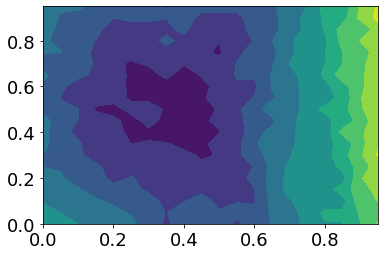

In [5]:
path = 'Results/BenchmarkTests/VGG16_emit+defocus_test6_attempt3_HPonly/'
Z = np.load(path + 'GridScan_0-1_20x20.npy')
x = np.arange(0, 1, 0.05) 
y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(x, y)
plt.contourf(x,y,Z)
print(np.amin(Z))
# np.save('GridScan_0-1_20x20.npy', Z)

In [55]:
np.amin(Z)

0.021462351083755493

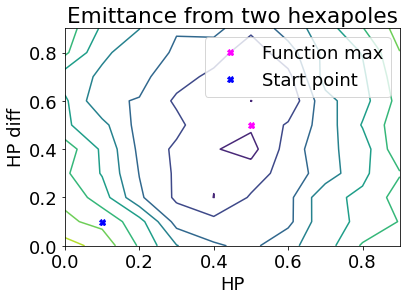

In [13]:
plt.contour(X, Y, Z);
plt.title('Emittance from two hexapoles')
plt.plot(x0[0],x0[1],'X',color='magenta',label='Function max')
plt.plot(xs[0],xs[1],'Xb', label = 'Start point'); 
plt.legend(); plt.xlabel('HP'); plt.ylabel('HP diff')
plt.show()

# SLAC GP

In [41]:
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import importlib

In [61]:
# Create the gp
gp_ls = np.array([0.390, 0.595])  # GPy setup
gp_amp = 0.194
gp_noise_variance = 0.0002

# TFGP result
gp_ls = np.asarray([0.542, 0.706])/20
gp_amp = 0.162
noise = 0.0002
noise = 0

gp_precisionmat = (np.diag(1/gp_ls**2))
hyperparams = {'precisionMatrix': gp_precisionmat, 'amplitude_covar': gp_amp, 'noise_variance': gp_noise_variance} 
# gp = OGP(ndim, hyperparams,covar = ['RBF','MATERN32','MATERN52','x2','booth'][0])
gp = OGP(ndim, hyperparams)

In [62]:
# run the bayesian optimizer that will use the gp as the model to optimize the machine 
optimize_kernel_on_the_fly = 0
opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids, 
               optimize_kernel_on_the_fly = None)
# opt.bounds = ((0,1), (0,1))
# opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
y_gp=[]

Supposed to be grabbing initial machine state...
Using CNN prediction.
saving ronchigram...
x_init [[0.36567956 0.45705651]]
y_init [[0.96766192]]


iteration = 29
Using CNN prediction.
saving ronchigram...
current position: [[0.4403622  0.41050801]] current objective value: [[-0.94445067]]
Using CNN prediction.
saving ronchigram...


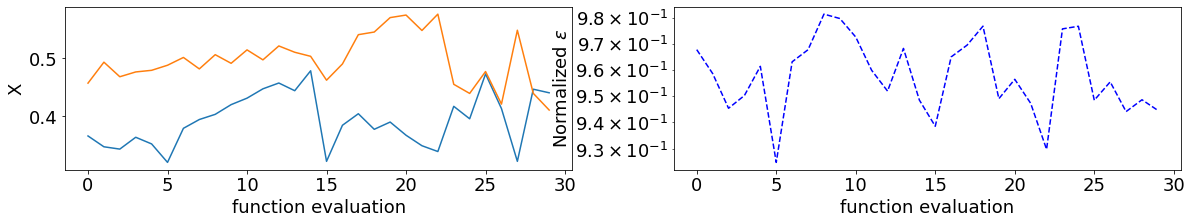

/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/parallelstuff.py:442: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = res[[~np.isnan(res[:,1])]]
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/parallelstuff.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res)
/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.p

Using CNN prediction.
saving ronchigram...


In [63]:
Niter = 30
for i in range(Niter):
    clear_output(wait=True) 
    print ('iteration =', i)
    print ('current position:', mi.x, 'current objective value:', -mi.getState()[1])
    y_gp.append(mi.getState()[1][0])
    plot_results(opt.X_obs,y_gp); plt.show()
#     if optimize_kernel_on_the_fly is not None:
#         if i > optimize_kernel_on_the_fly:
#             opt.optimize_kernel_hyperparameters(noiseQ = False)  
    
    opt.OptIter()


min f: 0.98149


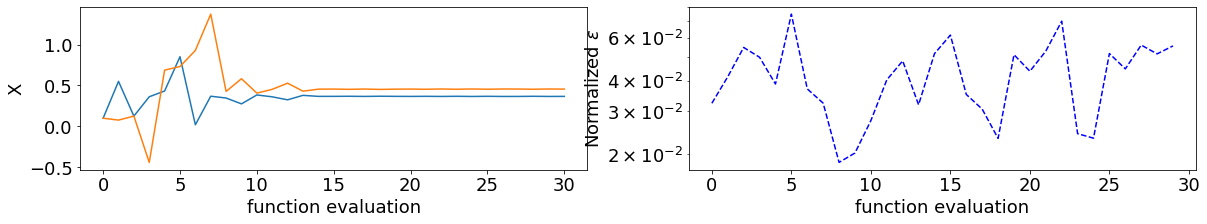

In [64]:
print("min f: {:.5f}".format(np.amax(y_gp)) )
plot_results(x_gp,1-np.asarray(y_gp)); 
plt.show()

In [65]:
np.save(path + 'SLAC_GP_X-obs_nbest3_nstart1_emit+defocus_refine_20xSmallerLS.npy',opt.X_obs)
np.save(path + 'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus_refine_20xSmallerLS.npy',y_gp)

In [12]:
x_gp = np.load(path + 'SLAC_GP_X-obs_nbest3_nstart1_emit+defocus.npy')
y_gp = np.load(path + 'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus.npy')

In [13]:
ind = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
print(ind)

(9, 8)


In [14]:
print(x_gp[np.argmax(y_gp),0], x_gp[np.argmax(y_gp), 1])
print(np.amax(y_gp))

0.36567956155397874 0.4570565113450329
0.9676619172096252


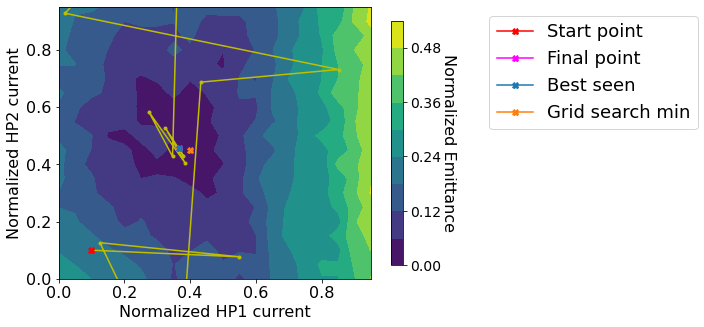

In [15]:
# make contour plot
fig, ax = plt.subplots(1,1, figsize=(7,5))
img = ax.contourf(X, Y, Z);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('Normalized HP1 current', fontsize = 16)
ax.set_ylabel('Normalized HP2 current', fontsize=16)
cbar = fig.colorbar(img, ax=ax, shrink=0.9)
cbar.ax.locator_params(nbins=5)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('Normalized Emittance',fontsize = 16, rotation=270)

# Overlap searching track on top of the contour grid
plt.plot(x_gp[:,0],x_gp[:,1],'.-y'); 
plt.plot(x_gp[0,0],x_gp[0,1],marker='X',color='red', label = 'Start point')
plt.plot(x_gp[-1,0],x_gp[-1,1],marker='X',color='magenta', label = 'Final point'); # Final GP point
plt.plot(x_gp[np.argmax(y_gp),0], x_gp[np.argmax(y_gp), 1], marker = 'X', color = 'C0', label = 'Best seen')
plt.plot(x[ind[1]], y[ind[0]], marker = 'X', color = 'C1', label = 'Grid search min') # Final point detected by GPy
plt.xlim([0,0.95]); plt.ylim([0,0.95]);
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper left')

# Gpy

In [19]:
import GPyOpt
from numpy.random import seed 

def booth(x):
    mi.setX(x)
    y = mi.getState()[1][0]
    return 1-y

bounds =[{'name': 'x_1', 'type': 'continuous', 'domain': (0,1)}, 
         {'name': 'x_2', 'type': 'continuous', 'domain': (0,1)}]

seed(123) 

y_gpy = GPyOpt.methods.BayesianOptimization(booth,                   
                                                domain=bounds,                
                                                acquisition_type='EI',        
                                                exact_feval = True,           
                                                initial_design_type ="latin", 
                                                initial_design_numdata=20 )   
max_iter = 30
y_gpy.run_optimization(max_iter) 

Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN prediction.
saving ronchigram...
Using CNN p

min f: 0.05086
argmin f: 0.47500, 0.37500


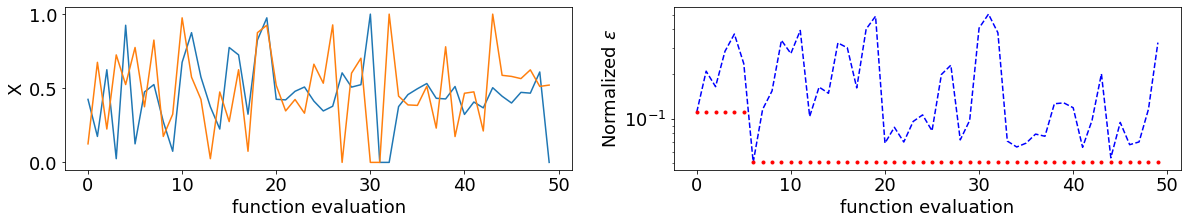

In [20]:
plot_results(y_gpy.get_evaluations()[0],y_gpy.get_evaluations()[1]);
plt.plot(y_gpy.Y_best,'.r');

print("min f: {:.5f}".format(y_gpy.fx_opt)) 
print("argmin f: {:.5f}, {:.5f}".format(y_gpy.x_opt[0], 
                                        y_gpy.x_opt[1]))

In [28]:
np.save('GPy_X-obs.npy',y_gpy.get_evaluations()[0])
np.save('GPy_Y-obs', y_gpy.get_evaluations()[1])

In [14]:
# y_gpy.plot_convergence() 
# y_gpy.plot_acquisition()
# print(y_gpy.model.get_model_parameters_names(),y_gpy.model.get_model_parameters())
# y_gpy.model_parameters_iterations

# Bayseopt 
Code from: https://github.com/fmfn/BayesianOptimization

In [29]:
from bayes_opt import BayesianOptimization

pbounds = {'x': (0, 1),
           'y': (0, 1)}

f = function()
def evaluate(x,y):
    return f.Booth([x,y])[0]

optimizer = BayesianOptimization(
    f = evaluate,
    pbounds = pbounds,
    random_state = 1,
)

optimizer.maximize(
    init_points=5,
    n_iter=30,
#     verbose=0
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
[0.417022004702574, 0.7203244934421581]
Using CNN prediction.
saving ronchigram...
|  1        |  0.1095   |  0.417    |  0.7203   |
[0.00011437481734488664, 0.30233257263183977]
Using CNN prediction.
saving ronchigram...
|  2        |  0.3585   |  0.000114 |  0.3023   |
[0.14675589081711304, 0.0923385947687978]
Using CNN prediction.
saving ronchigram...
|  3        |  0.4005   |  0.1468   |  0.09234  |
[0.1862602113776709, 0.34556072704304774]
Using CNN prediction.
saving ronchigram...
|  4        |  0.1939   |  0.1863   |  0.3456   |
[0.39676747423066994, 0.538816734003357]
Using CNN prediction.
saving ronchigram...
|  5        |  0.07462  |  0.3968   |  0.5388   |
[9.695068767479054e-05, 0.00956689437851066]
Using CNN prediction.
saving ronchigram...
|  6        |  0.5034   |  9.695e-0 |  0.009567 |
[1.0, 0.0]
Using CNN prediction.
saving ronchigram...
|  7        |  0.407    |  1.0  

AttributeError: 'str' object has no attribute 'decode'

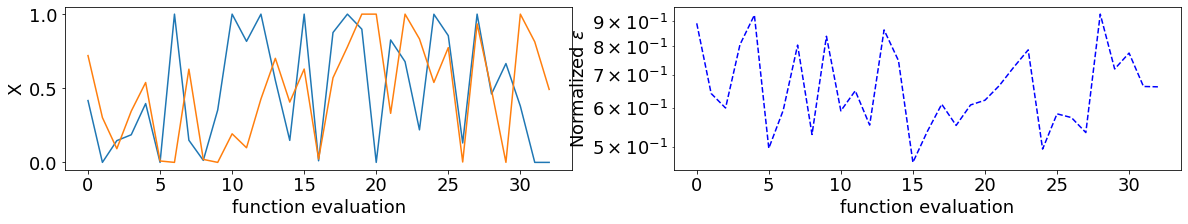

In [30]:
y_bo = f.my_y ; x_bo = f.my_x
plot_results(x_bo,y_bo)

In [40]:
np.save('BayesOpt_X-obs.npy',x_bo)
np.save('BayesOpt_Y-obs.npy', y_bo)
print(np.amin(y_bo))

0.46491122245788574


# Simplex / L-BFGS-B 

In [34]:
from scipy.optimize import minimize

def more_optimizers(method=['Nelder-Mead','L-BFGS-B','CG'][0]):
    f = function()
    result = minimize(f.Booth, x0=xs, method=method)
    print("Found minimum at {0}".format(result.x))
    print("Number of function evaluations {0}".format(f.my_counter))
    return f.my_y , f.my_x

[0.1 0.1]
Using CNN prediction.
saving ronchigram...
[0.105 0.1  ]
Using CNN prediction.
saving ronchigram...
[0.1   0.105]
Using CNN prediction.
saving ronchigram...
[0.095 0.105]
Using CNN prediction.
saving ronchigram...
[0.0975  0.10375]
Using CNN prediction.
saving ronchigram...
[0.0975  0.10875]
Using CNN prediction.
saving ronchigram...
[0.098125  0.1065625]
Using CNN prediction.
saving ronchigram...
[0.09875  0.104375]
Using CNN prediction.
saving ronchigram...
[0.09875  0.101875]
Using CNN prediction.
saving ronchigram...
[0.0975  0.10125]
Using CNN prediction.
saving ronchigram...
[0.0984375  0.10359375]
Using CNN prediction.
saving ronchigram...
[0.0996875  0.10171875]
Using CNN prediction.
saving ronchigram...
[0.09804688 0.10324219]
Using CNN prediction.
saving ronchigram...
[0.09914063 0.10222656]
Using CNN prediction.
saving ronchigram...
[0.09832031 0.10298828]
Using CNN prediction.
saving ronchigram...
[0.09863281 0.10126953]
Using CNN prediction.
saving ronchigram...


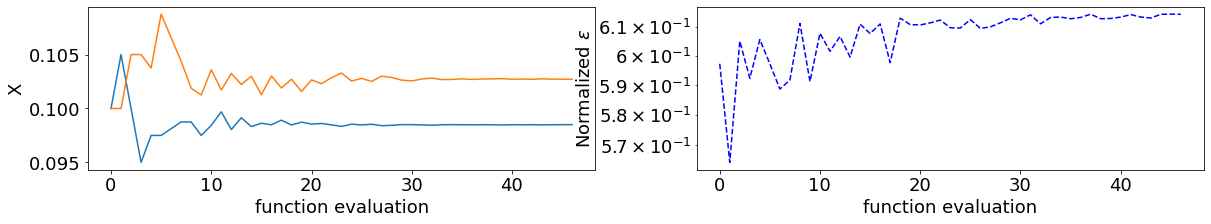

In [35]:
y_simplex , x_simplex = more_optimizers(method='Nelder-Mead')
plot_results(x_simplex,y_simplex)

In [39]:
np.save('Simplex_X-obs.npy',x_simplex)
np.save('Simplex_Y-obs.npy', y_simplex)
print(np.amin(y_simplex))

0.5644901394844055


In [68]:
# y_LBFGSB ,x_LBFGSB =more_optimizers(method='L-BFGS-B')
# plot_results(x_LBFGSB,y_LBFGSB)

# Compare different minimization tools

In [32]:
# Load the data from previous calculations, Xs are not necessary.
path = 'Results/BenchmarkTests/VGG16_emit+defocus_test6_attempt3_HPonly/'
x_gpy = np.load(path + 'GPy_X-obs.npy')
y_gpy = np.load(path +'GPy_Y-obs.npy')
x_simplex = np.load(path +'Simplex_X-obs.npy')
y_simplex = np.load(path +'Simplex_Y-obs.npy')
x_bo = np.load(path +'BayesOpt_X-obs.npy')
y_bo = np.load(path +'BayesOpt_Y-obs.npy')
x_gp = np.load(path +'SLAC_GP_X-obs_nbest3_nstart1_emit+defocus.npy')
y_gp = np.load(path +'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus.npy')
x_gp_OOTF = np.load(path +'SLAC_GP_X-obs_nbest3_nstart1_emit+defocus_OOTF5.npy')
y_gp_OOTF = np.load(path +'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus_OOTF5.npy')

/home/chenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


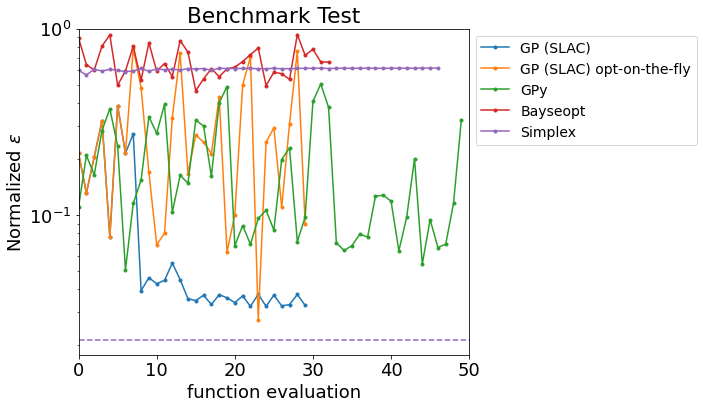

In [33]:
f = plt.figure(figsize=(7,6));  plt.xlabel('function evaluation'); plt.ylabel('Normalized $\epsilon$')
plt.plot(1-np.asarray(y_gp),marker='.',linestyle='-',label='GP (SLAC)');
plt.plot(1-np.asarray(y_gp_OOTF),marker='.',linestyle='-',label='GP (SLAC) opt-on-the-fly');
# plt.plot(y_gpy.Y_best,marker='.',linestyle='-',label='GPy, best');
plt.plot(y_gpy,marker='.',linestyle='-',label='GPy');
plt.plot(y_bo,marker='.',linestyle='-',label='Bayseopt');
plt.plot(y_simplex,marker='.',linestyle='-',label='Simplex');
# plt.plot(y_LBFGSB,marker='.',linestyle='-',label='L-BFGS-B');
plt.legend(fontsize = 14, loc = 'upper right', bbox_to_anchor=(1.6, 1)); 
plt.axhline(y = np.amin(Z), linestyle = '--', color='C4', label = '20x20 grid search')
plt.xlim([0,50]);
plt.yscale('log');
plt.ylim([0, 1]);
plt.title('Benchmark Test');

## Compare different SLAC GP parameters

In [6]:
y_gp_1 = np.load(path + 'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus.npy')
y_gp_2 = np.load(path + 'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus_60iter_10xSmallerLS.npy')
y_gp_3 = np.load(path + 'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus_refine_10xSmallerLS.npy')
y_gp_4 = np.load(path + 'SLAC_GP_Y-obs_nbest3_nstart1_emit+defocus_30iter_noReset_10xSmallerLS.npy')

/home/chenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


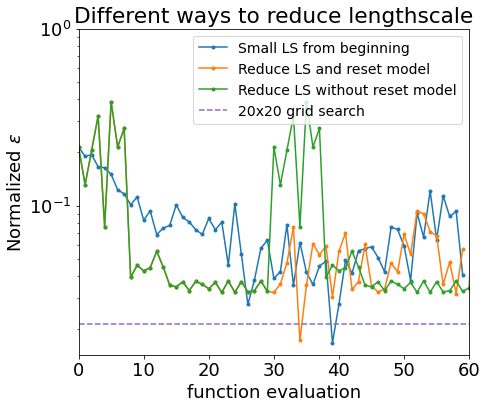

In [83]:
f = plt.figure(figsize=(7,6));  plt.xlabel('function evaluation'); plt.ylabel('Normalized $\epsilon$')
plt.plot(1 - y_gp_2,marker='.',linestyle='-',label='Small LS from beginning');
plt.plot(1-np.concatenate((y_gp_1, y_gp_3)),marker='.',linestyle='-',label='Reduce LS and reset model');
plt.plot(1-np.concatenate((y_gp_1, y_gp_4)),marker='.',linestyle='-',label='Reduce LS without reset model');
plt.axhline(y = np.amin(Z), linestyle = '--', color='C4', label = '20x20 grid search')
plt.legend(fontsize = 14, loc = 'upper right'); 
plt.xlim([0,60]);
plt.yscale('log');
plt.ylim([0, 1]);
plt.title('Different ways to reduce lengthscale');

NameError: name 'x_gp' is not defined

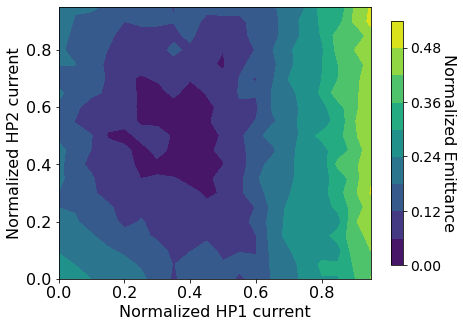

In [7]:
# make contour plot
fig, ax = plt.subplots(1,1, figsize=(7,5))
img = ax.contourf(X, Y, Z);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('Normalized HP1 current', fontsize = 16)
ax.set_ylabel('Normalized HP2 current', fontsize=16)
cbar = fig.colorbar(img, ax=ax, shrink=0.9)
cbar.ax.locator_params(nbins=5)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('Normalized Emittance',fontsize = 16, rotation=270)

# Overlap searching track on top of the contour grid
plt.plot(x_gp[:,0],x_gp[:,1],'.-y'); 
plt.plot(x_gp[0,0],x_gp[0,1],marker='X',color='red', label = 'Start point')
plt.plot(x_gp[-1,0],x_gp[-1,1],marker='X',color='magenta', label = 'Final point'); # Final GP point
plt.plot(x_gp[np.argmax(y_gp),0], x_gp[np.argmax(y_gp), 1], marker = 'X', color = 'C0', label = 'Best seen')
plt.plot(x[ind[1]], y[ind[0]], marker = 'X', color = 'C1', label = 'Grid search min') # Final point detected by GPy
plt.xlim([0,0.95]); plt.ylim([0,0.95]);
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper left')